# Outliers
Identifying and removing outliers in linear regression
## Net Worth Problem Revisited

In [1]:
#imports
import random
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from outlier_cleaner import outlierCleaner

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

/home/rad/ml_week_py2/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [3]:
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
print "Slope of the regression", reg.coef_[0][0]

Slope of the regression 5.07793064344


In [5]:
print "Score of the regression is", reg.score(ages_test, net_worths_test)

Score of the regression is 0.878262470366


### After cleaning up outliers
Modifying code from `outlier_cleaner.py`

In [90]:
def outlierCleaner(predictions, X, Y):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (X, Y, error).
    """
    
    cleaned_data = []

    length = len(X)
    
    residuals = []
    for i, prediction in enumerate(predictions):
        residuals.append(abs(prediction - Y[i]))
    
    
    data = zip(X, Y, residuals)
    
    residuals.sort()
    residuals.reverse()
    
    remove_num = length / 10
    
    res_remove = residuals[:remove_num]
    
    for i in range(len(data)-1):
        if i > len(data) - 1:
            break
        if data[i][2] in res_remove:
            data.pop(i)

    return cleaned_data

In [6]:
predictions = reg.predict(ages_train)
cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train)

90
3
(array([57]), array([ 338.08951849]), array([ 23.43745027]))


[]

## Enron Data
Returning to the bonuses-salary regression from before. 

In [7]:
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features_list = ["salary", "bonus"]
data = featureFormat(data_dict, features_list)

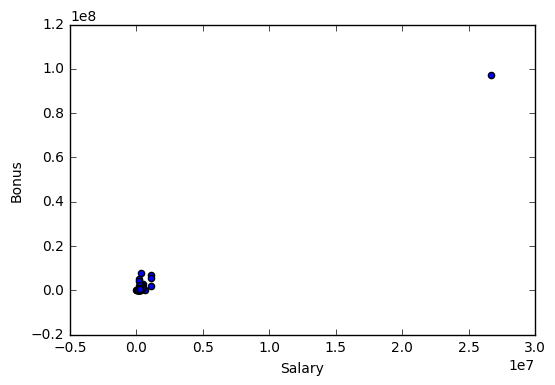

In [18]:
# Plot scatterplot of data
def plt_scatterplot(data):
    for point in data:
        salary = point[0]
        bonus = point[1]
        plt.scatter(salary, bonus)
    plt.xlabel('Salary')
    plt.ylabel('Bonus')
    plt.show()
plt_scatterplot(data)

In [17]:
# Find the reason for this outlier
for name, person in data_dict.items():
    if isinstance(person['salary'], int) and person['salary'] > 10000000:
        print name, "has a big salary"

TOTAL has a big salary


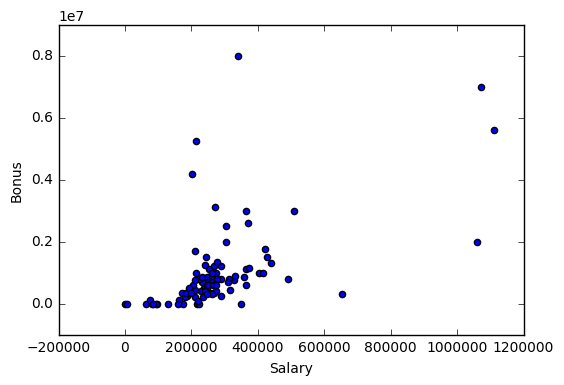

In [19]:
# Remove TOTAL outlier
data_dict.pop("TOTAL",0)
features_list = ["salary", "bonus"]
data = featureFormat(data_dict, features_list)
plt_scatterplot(data)

In [20]:
# Find other people who "made out like bandits"
for name, person in data_dict.items():
    if (isinstance(person['salary'], int) and person['salary'] > 1000000) and (isinstance(person['bonus'], int) and person['bonus'] > 1000000):
        print name, "made out like a bandit with a salary of $", person['salary'], "and a bonus of $", person['bonus']

LAY KENNETH L made out like a bandit with a salary of $ 1072321 and a bonus of $ 7000000
SKILLING JEFFREY K made out like a bandit with a salary of $ 1111258 and a bonus of $ 5600000
FREVERT MARK A made out like a bandit with a salary of $ 1060932 and a bonus of $ 2000000
